# Reproducing - Shanghai Composite Index

- PAPER: [Financial Time Series Forecasting with the Deep Learning Ensemble Model](https://www.mdpi.com/2227-7390/11/4/1054) by He K., et al. 2023

## TODOs

In [1]:
import os
import sys
# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../tslearn/'))

from collections import namedtuple
from data_loader import build_stock_uts, build_downloaded_stock_uts
from ts_models import RandomWalk, ARMA, EvaluationMetric
from time_series import TimeSeriesFactory, TimeSeriesMixin, UnivariateTimeSeries

## Stock Data Analysis with Forecasts

1. Load Raw Data
2. Plot Raw Data
3. Get Descriptive Statistics (ie: mean, median, range, etc) of Raw Data
4. Check Stationarity of Raw Data
5. Plot Autocorrelation and Partial Autocorrelation of Raw Data
6. Get Returns Data
7. Plot Returns Data
8. Get Descriptive Statistics (ie: mean, median, range, etc) of Returns Data
9. Check Stationarity of Returns Data
10. Plot Autocorrelation and Partial Autocorrelation of Returns Data
11. Split Returns Data
12. Initialize Autoregressive `AR(p)` Model
13. Predict Forecasts for Returns Data
14. Plot Actual Forecasts vs Predicted Forecasts for Returns Data
24. Follow-up

### Load Raw Data

In [2]:
# # Only grab stocks whose data is available for the entire time period
# start_date, end_date = "2010-01-04", "2024-12-30"
# Stock = namedtuple("Stock", ["symbol", "name"])
# stocks = [
#     ("000001.SS", "Shanghai Composite Index")
# ]
independent_variable = "Close"
# # frequency = 
# stocks = [Stock(*s) for s in stocks]
# stocks = {s.symbol: build_stock_uts(s.symbol, s.name, independent_variable, start_date=start_date, end_date=end_date, frequency='1d') for s in stocks}

In [3]:
# values_cols = list(stocks.keys())
# stock_mvts = TimeSeriesFactory.create_time_series(
#     time_col="date",
#     time_values=stocks[values_cols[0]].data.index,
#     values_cols=values_cols,
#     values=[stock.get_series() for stock in stocks.values()]
# )

In [4]:
# stock_symbol = '000001.SS'
# stock_of_interest = stocks[stock_symbol]
# type(stock_of_interest), stock_of_interest

In [5]:
FILE_NAME = 'VOO_DAILY_06-02-23_TO_06-06-22'
stock_of_interest = build_downloaded_stock_uts(FILE_NAME, independent_variable)
type(stock_of_interest), stock_of_interest

(time_series.UnivariateTimeSeries, UnivariateTimeSeries(Close))

In [6]:
stock_df = stock_of_interest.get_as_df()
stock_df

,Close
Date,
0,378.470001
1,382.170013
2,377.989990
3,369.100006
4,358.269989
...,...
245,385.869995
246,385.989990
247,383.890015


In [7]:
stock_series = stock_of_interest.get_as_df()
stock_series

,Close
Date,
0,378.470001
1,382.170013
2,377.989990
3,369.100006
4,358.269989
...,...
245,385.869995
246,385.989990
247,383.890015


In [8]:
n_steps = 3
output_size = 2

# old_converted_seq_df = stock_of_interest.old_augment_data(n_steps, output_size)

In [9]:
# old_converted_seq_df

In [10]:
# old_converted_seq_df.get_as_df()

In [11]:
converted_seq_df = stock_of_interest.augment_data(n_steps, output_size)
converted_seq_df

MultivariateTimeSeries(t-2, t-1)

In [12]:
converted_seq_df.get_as_df()

,t-2,t-1
Date,,
2,378.470001,382.170013
3,382.170013,377.989990
4,377.989990,369.100006
5,369.100006,358.269989
6,358.269989,344.459991
...,...,...
243,384.779999,380.480011
244,380.480011,377.630005
245,377.630005,380.920013


In [13]:
type(converted_seq_df)

time_series.MultivariateTimeSeries

### Plot Raw Data

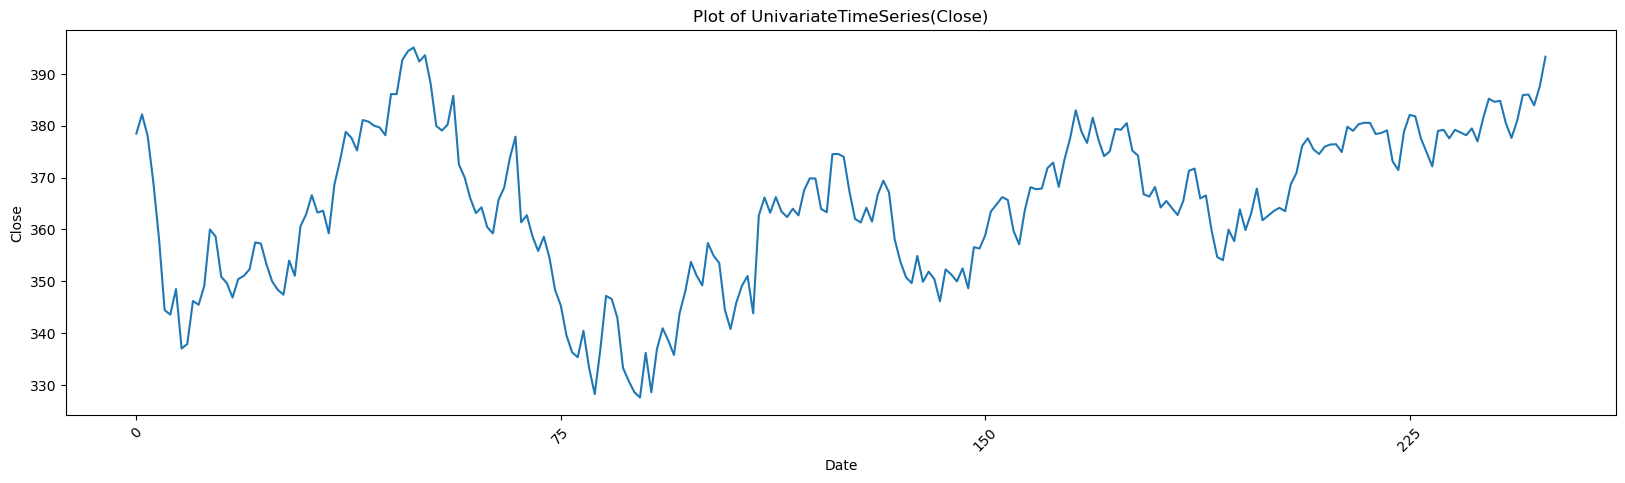

In [14]:
stock_of_interest.plot(tick_skip=75)

### Get Descriptive Statistics of Raw Data

In [15]:
stock_of_interest.get_statistics()

,Close
count,250.000000
mean,364.288320
std,14.725851
min,327.640015
25%,353.577492
50%,364.539994
75%,377.242500
max,395.040009


In [16]:
stock_of_interest.range_skewness_kurtosis()

{'Range': Close    67.399994
 dtype: float64,
 'Skewness': Close   -0.328869
 dtype: float64,
 'Kurtosis': Close   -0.487223
 dtype: float64}

### Check Stationarity of Raw Data

- With financial data, we expect it to be non-stationary (as in there's a change in either or both the mean of the variance between two distant points).

In [17]:
stock_of_interest.stationarity_test(stock_df)

ADF Statistic: -2.262029
p-value: 0.184507 > 0.05 , so accept the null-hypothesis as the TS is non-stationary
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


### Plot Autocorrelation and Partial Autocorrelation of Raw Data

- Not required for `AR` or `ARMA` models as both models assumes stationary and the TS is non-stationary.

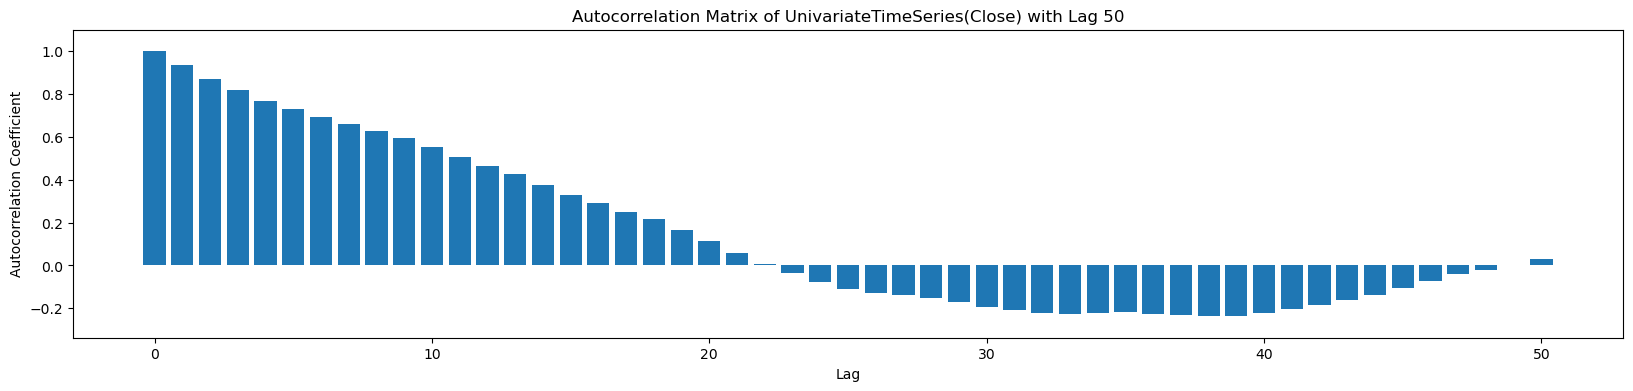

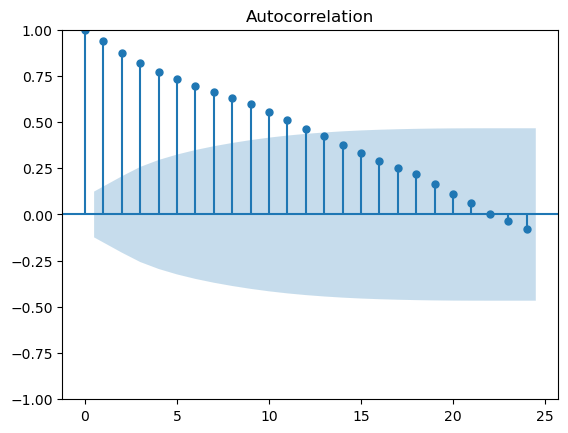

In [18]:
stock_of_interest.plot_autocorrelation(50)

- What is the above telling us?
    - Both plots are the same, just showing differently. 
    - Both plots confirm that the TS is non-stationary as in the current value depends on the previous value. We don't want this.

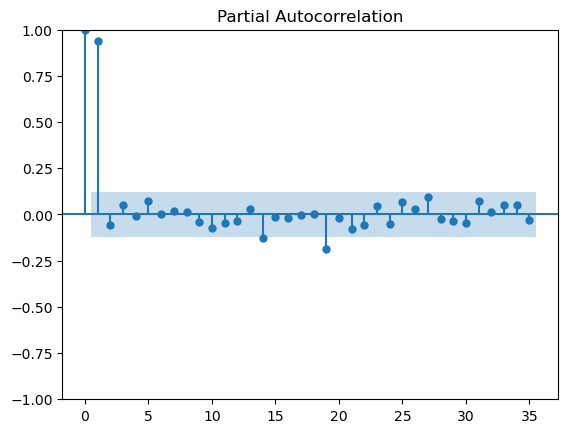

In [19]:
stock_of_interest.plot_partial_autocorrelation(35)

- What is the above telling us?
    - TS is non-stationary. Although data isn't as dependent (like the ACorr plot), the 1st is dependent upon the 0th. 

### Get Returns Data

- This should provide us with stationary data that we can pass to both `AR` and `ARMA` models.

In [20]:
len(stock_of_interest.get_series()), stock_of_interest.get_series()

(250,
 array([378.470001, 382.170013, 377.98999 , 369.100006, 358.269989,
        344.459991, 343.600006, 348.519989, 337.070007, 337.950012,
        346.230011, 345.5     , 349.130005, 360.      , 358.649994,
        350.899994, 349.640015, 346.880005, 350.440002, 351.059998,
        352.329987, 357.5     , 357.290009, 353.25    , 349.98999 ,
        348.359985, 347.440002, 354.01001 , 351.079987, 360.609985,
        362.920013, 366.589996, 363.25    , 363.609985, 359.25    ,
        368.660004, 373.320007, 378.790009, 377.649994, 375.209991,
        381.070007, 380.769989, 379.980011, 379.640015, 378.140015,
        386.059998, 386.059998, 392.670013, 394.350006, 395.040009,
        392.339996, 393.549988, 388.119995, 379.940002, 379.040009,
        380.190002, 385.730011, 372.51001 , 370.049988, 366.029999,
        363.149994, 364.269989, 360.450012, 359.23999 , 365.679993,
        368.070007, 373.75    , 377.859985, 361.380005, 362.730011,
        358.679993, 355.859985, 358.589996

In [21]:
stock_returns = stock_of_interest.data_augment_for_returns()
stock_returns

UnivariateTimeSeries(Returns)

### Plot Returns

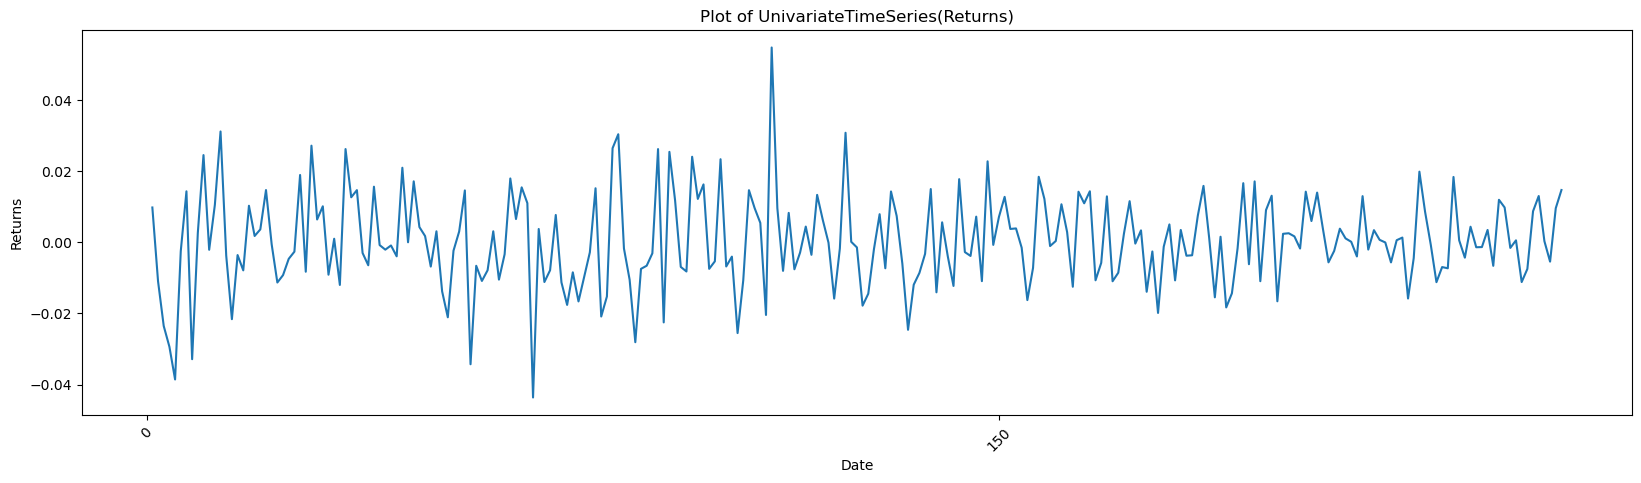

In [22]:
stock_returns.plot(tick_skip=150)

- Returns seem to have constant mean and constant although there are a few wide spread mean values between ~2014-10-07 to 2016-05-29 and ~2017-08-22 to 2019-04-14.

In [23]:
stock_returns_df = stock_returns.get_as_df()
stock_returns_df

,Returns
Date,
1,0.009776
2,-0.010938
3,-0.023519
4,-0.029342
5,-0.038546
...,...
245,0.012995
246,0.000311
247,-0.005440


### Get Descriptive Statistics of Returns Data

In [24]:
stock_returns.get_statistics()

,Returns
count,249.000000
mean,0.000240
std,0.013147
min,-0.043614
25%,-0.007491
50%,-0.000787
75%,0.009567
max,0.054730


In [25]:
stock_returns.range_skewness_kurtosis()

{'Range': Returns    0.098344
 dtype: float64,
 'Skewness': Returns    0.105133
 dtype: float64,
 'Kurtosis': Returns    1.261925
 dtype: float64}

### Check Stationarity of Returns Data

- Data is now stationary. Confirm with independence test which is only conducted on returns and has a null-hypothesis of data being independent (or not dependent).

In [26]:
stock_returns.stationarity_test(stock_returns_df)

ADF Statistic: -15.025817
p-value: 0.000000 < 0.05 , so reject null-hypothesis as the TS is stationary
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [27]:
stock_returns.independence_test(stock_returns_df)

BDS Statistic: 0.545859
p-value: 0.585163 > 0.05 , so accept the null-hypothesis as the differenced TS is dependent


### Plot Autocorrelation and Partial Autocorrelation of Returns Data

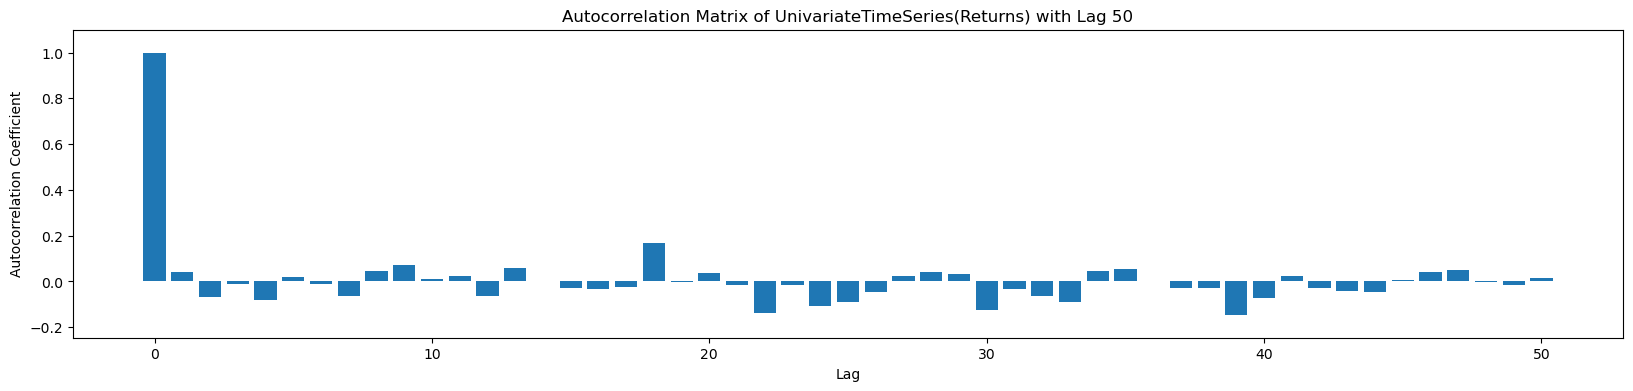

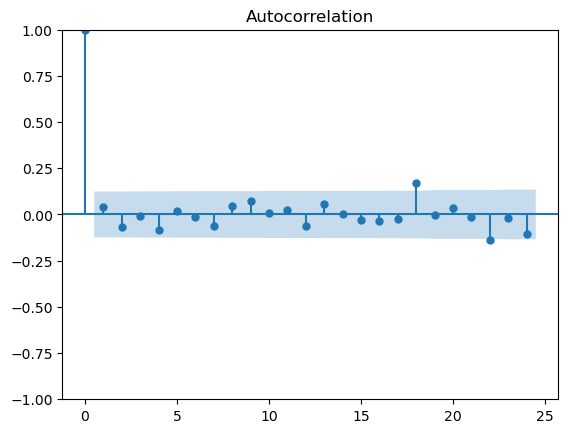

In [28]:
stock_returns.plot_autocorrelation(50)

- What is the above telling us?
    - Both plots are the same, just showing differently. 
    - Both plots confirm that the TS is stationary as in the current value doesn't depend on the previous value. This is what we want.
    - Lag exponentially decays at 1, thus use lag 1 for `MA(q)` as they have in the PAPER.


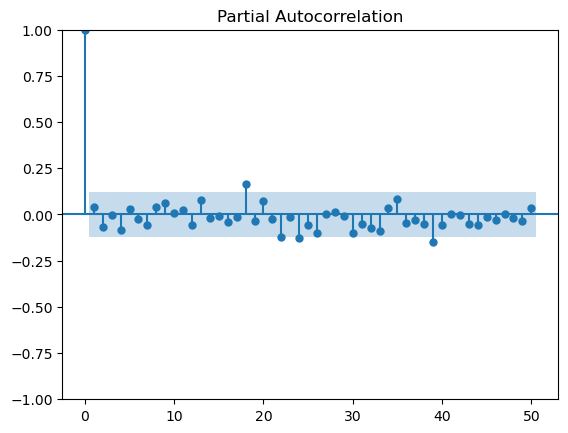

In [29]:
stock_returns.plot_partial_autocorrelation(50)

- What is the above telling us?
    - TS is stationary. The 1st is not dependent upon the 0th. This is what we want.
    - Lag exponentially decays at 1, thus use lag 1 for `AR(p)` as they have in the PAPER.

### Split Raw Data for RW Model

- Make 5-day forecasts

In [30]:
forecasting_step = 5
N = len(stock_of_interest.get_series())
train_length = N - forecasting_step

In [31]:
train_uts, test_uts = stock_of_interest.get_slice(1, train_length, both_train_test=True)
train_uts, test_uts

1 245


(UnivariateTimeSeries(UnivariateTimeSeries(Close)[1:245]),
 UnivariateTimeSeries(UnivariateTimeSeries(Close)[245:250]))

In [32]:
train_df = train_uts.get_as_df()
train_df

,UnivariateTimeSeries(Close)[1:245]
Date,
1,382.170013
2,377.989990
3,369.100006
4,358.269989
5,344.459991
...,...
240,384.570007
241,384.779999
242,380.480011


- Make 5-day forecasts, hence why test data is only 5 values.

In [33]:
test_df = test_uts.get_as_df()
test_df

,UnivariateTimeSeries(Close)[245:250]
Date,
245,385.869995
246,385.989990
247,383.890015
248,387.570007
249,393.260010


### RW

In [34]:
rw_model_class = RandomWalk()

rw_predictions = rw_model_class.predict(train_df, test_df)

In [35]:
type(rw_predictions[0]), len(rw_predictions), rw_predictions

(numpy.ndarray,
 5,
 [array([380.920013]),
  array([385.869995]),
  array([385.98999]),
  array([383.890015]),
  array([387.570007])])

In [36]:
rw_mse_gsts = EvaluationMetric.eval_mse(test_df, rw_predictions, per_element=False)
rw_rmse_gsts = EvaluationMetric.eval_rmse(test_df, rw_predictions, per_element=False)

Test MSE: 14.969
Test RMSE: 3.869


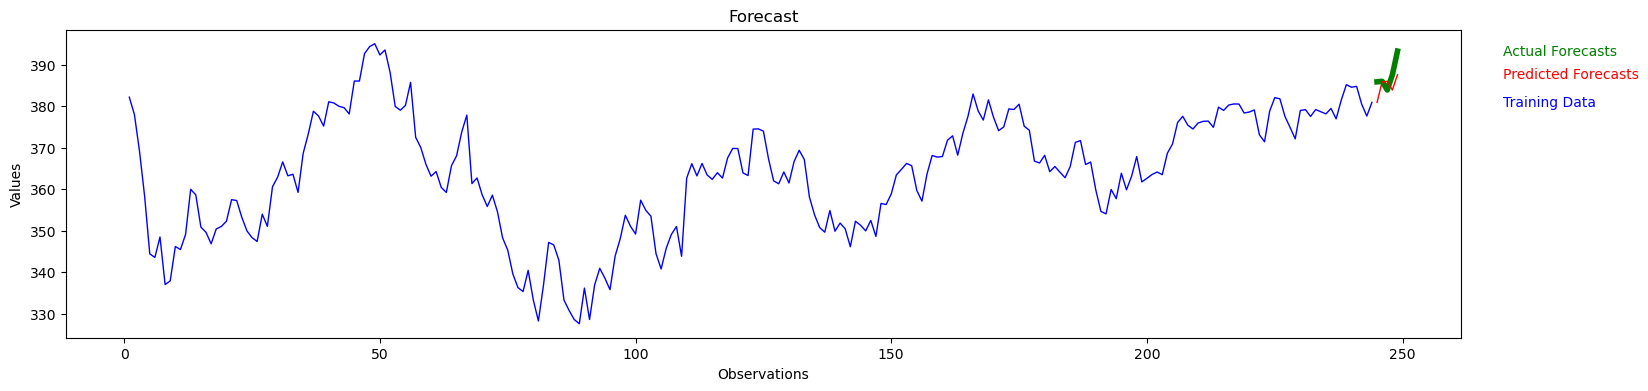

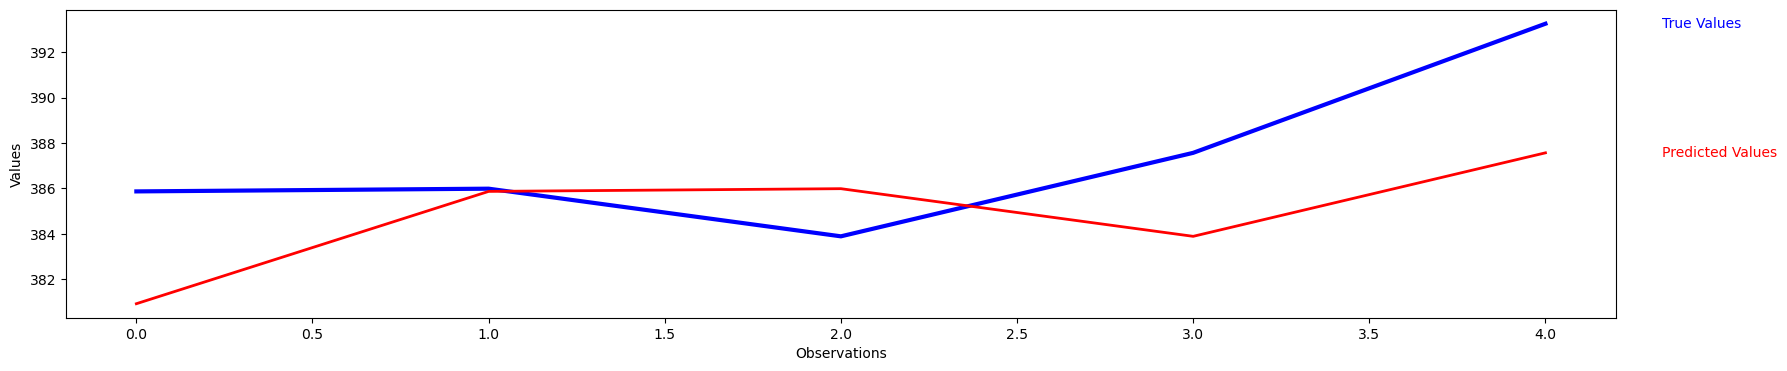

In [37]:
EvaluationMetric.plot_forecast(train_df, test_df, rw_predictions, per_element=False)
EvaluationMetric.plot_predictions(test_df, rw_predictions)

### Initialize Autoregressive ARMA(p, q) Model

### Split Differenced Data for ARMA(p, q) Model

- Make 5-day forecasts

In [38]:
forecasting_step = 5
N = len(stock_returns.get_series())
diff_train_length = N - forecasting_step

In [39]:
diff_train_uts, diff_test_uts = stock_returns.get_slice(1, diff_train_length, both_train_test=True)
diff_train_uts, diff_test_uts

1 244


(UnivariateTimeSeries(UnivariateTimeSeries(Returns)[1:244]),
 UnivariateTimeSeries(UnivariateTimeSeries(Returns)[244:249]))

In [40]:
diff_train_df = diff_train_uts.get_as_df()
diff_train_df

,UnivariateTimeSeries(Returns)[1:244]
Date,
2,-0.010938
3,-0.023519
4,-0.029342
5,-0.038546
6,-0.002497
...,...
240,-0.001584
241,0.000546
242,-0.011175


- Make 5-day forecasts, hence why test data is only 5 values.

In [41]:
diff_test_df = diff_test_uts.get_as_df()
diff_test_df

,UnivariateTimeSeries(Returns)[244:249]
Date,
245,0.012995
246,0.000311
247,-0.005440
248,0.009586
249,0.014681


In [42]:
lag_p = 1
error_q = 1

arma_model_class = ARMA()
arma_model = arma_model_class.train_arma_model(diff_train_df, lag_p, error_q)

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
trained_arma_model = arma_model_class.train_arma_model(diff_train_df, lag_p, error_q)
trained_arma_model

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
trained_arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                         
================================================================================================
Dep. Variable:     UnivariateTimeSeries(Returns)[1:244]   No. Observations:                  243
Model:                                   ARIMA(1, 0, 1)   Log Likelihood                 707.958
Date:                                  Tue, 04 Jun 2024   AIC                          -1409.916
Time:                                          21:41:31   BIC                          -1399.437
Sample:                                               0   HQIC                         -1405.695
                                                  - 243                                         
Covariance Type:                                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7866      0.253     -3.109      0.002      -1.282      -0.291
ma.L1          0.8422      0.220      3.827      0.000       0.411       1.274
sigma2         0.0002   1.25e-05     13.817      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                19.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
print('Coefficients: %s' % trained_arma_model.params)

Coefficients: ar.L1    -0.786562
ma.L1     0.842247
sigma2    0.000172
dtype: float64


NOTE: Should Dep. Variable be t as t depends on t - 1?

In [46]:
# retrain false
arma_predictions_no_retrain = arma_model_class.predict(arma_model, diff_train_df, diff_test_df, False, lag_p)

# retrain true
arma_predictions_retrain = arma_model_class.predict(arma_model, diff_train_df, diff_test_df, True, lag_p)

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
len(diff_test_df), len(arma_predictions_no_retrain), len(arma_predictions_retrain)

(5, 5, 5)

### Predict + Plot Actual Forecasts vs Predicted Forecasts for Raw Data

In [48]:
arma_mse_no_retrain = EvaluationMetric.eval_mse(diff_test_df, arma_predictions_no_retrain, per_element=False)
arma_rmse_no_retrain = EvaluationMetric.eval_rmse(diff_test_df, arma_predictions_no_retrain, per_element=False)

arma_mse_retrain = EvaluationMetric.eval_mse(diff_test_df, arma_predictions_retrain, per_element=False)
arma_rmse_retrain = EvaluationMetric.eval_rmse(diff_test_df, arma_predictions_retrain, per_element=False)

Test MSE: 0.000
Test RMSE: 0.010
Test MSE: 0.622
Test RMSE: 0.789


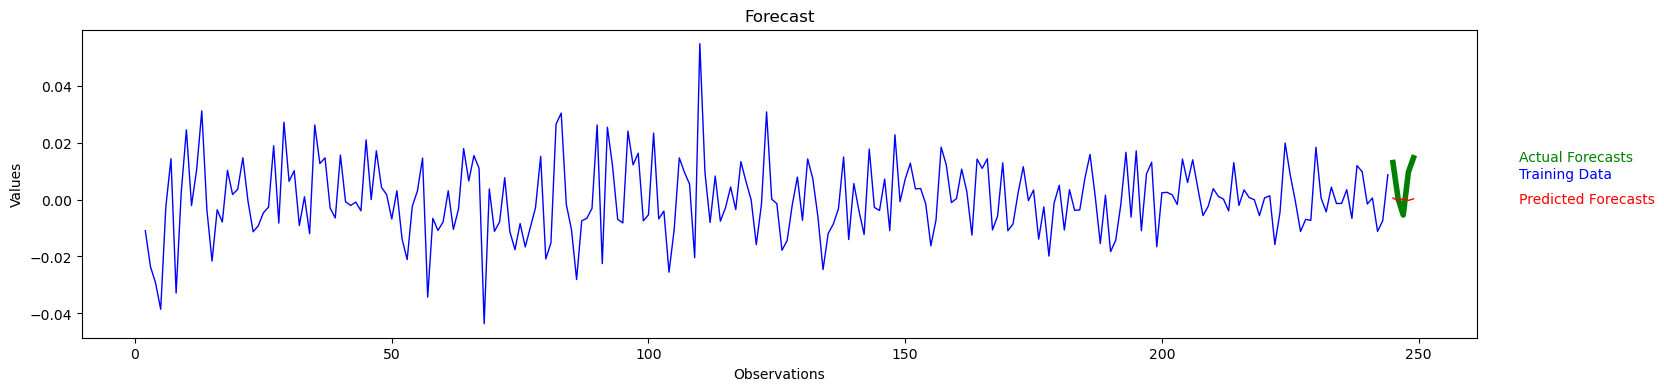

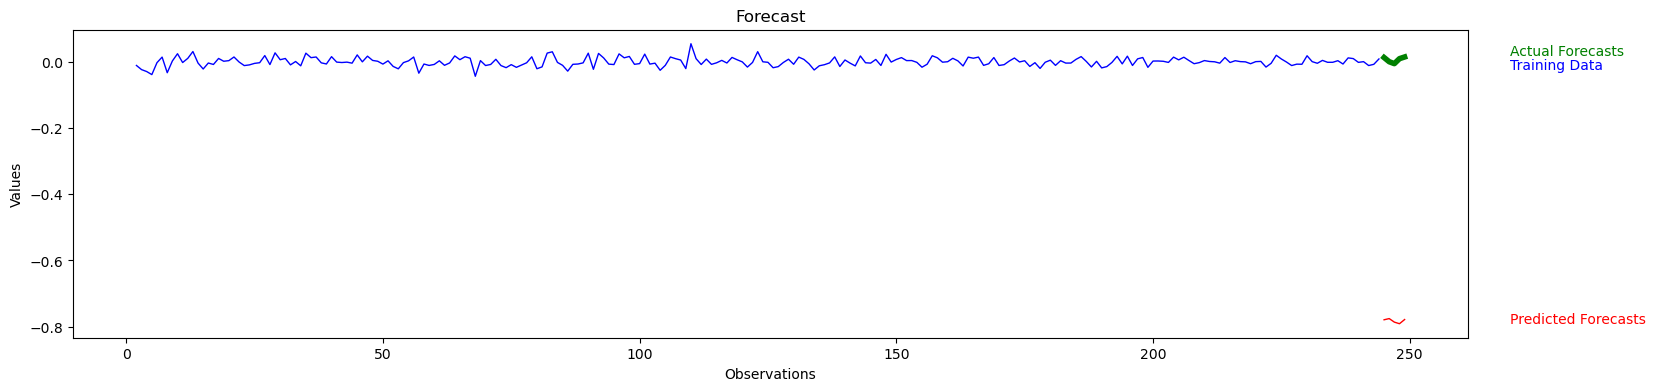

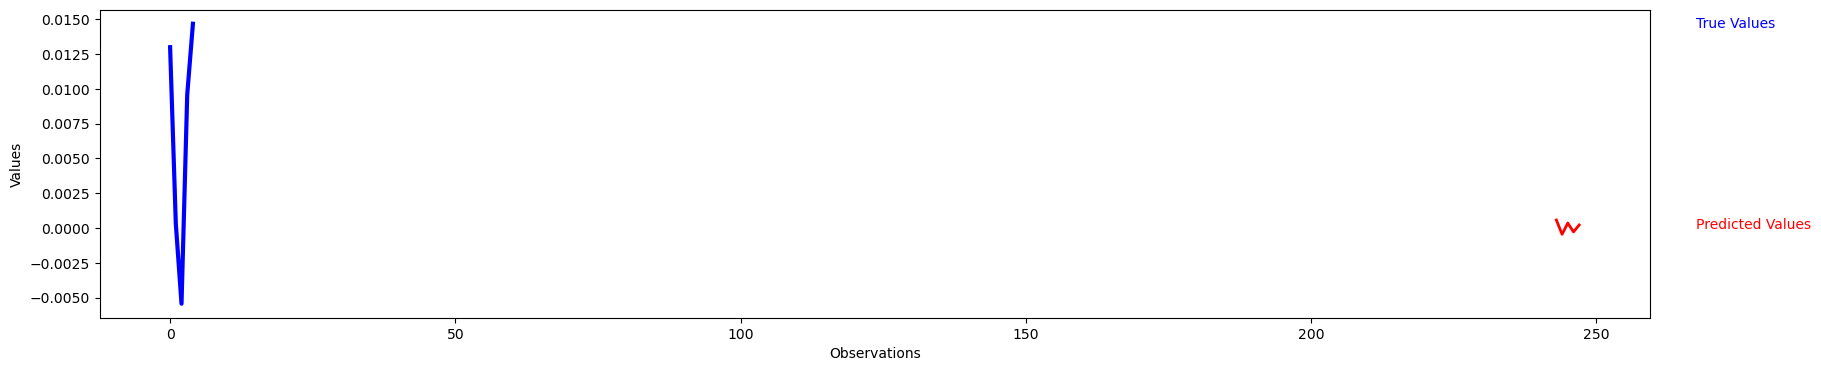

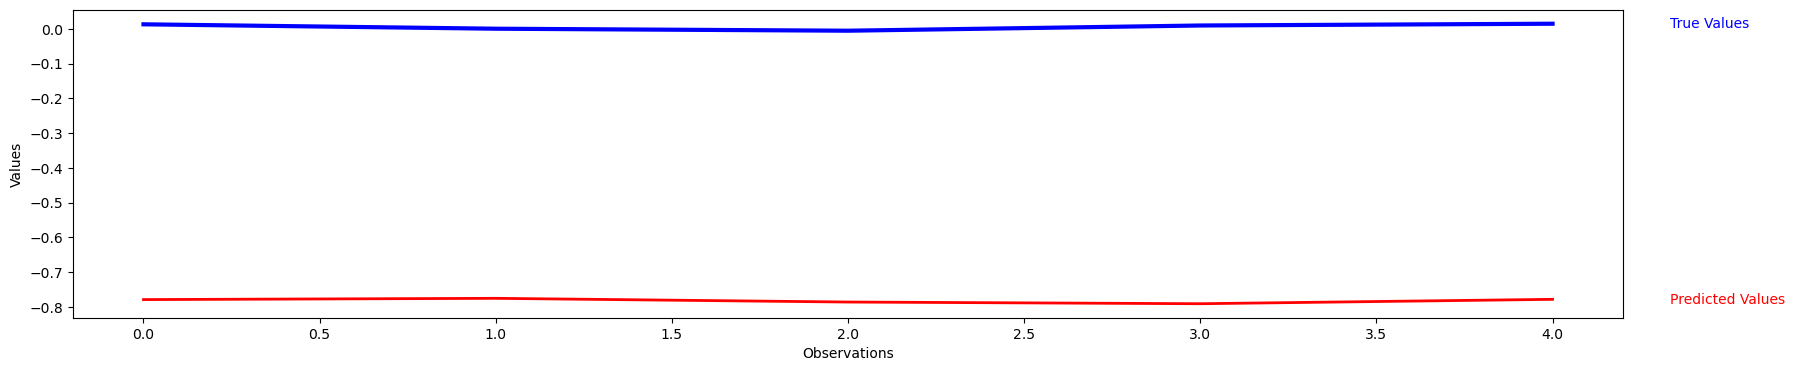

In [49]:
EvaluationMetric.plot_forecast(diff_train_df, diff_test_df, arma_predictions_no_retrain, False)
EvaluationMetric.plot_forecast(diff_train_df, diff_test_df, arma_predictions_retrain, False)
EvaluationMetric.plot_predictions(diff_test_df, arma_predictions_no_retrain)
EvaluationMetric.plot_predictions(diff_test_df, arma_predictions_retrain)

### Train Test Split Returns Data for ML Models

- 80% train and 20% test
- Return DF for now and fix later.

In [50]:
prior_observations =  3 
forecasting_step = 2
X_train_df, y_train_df = stock_of_interest.augment_data(prior_observations, forecasting_step)

KeyError: 0

In [ ]:
# X_train_df

In [ ]:
# y_train_df

In [ ]:
reformatted_returns_df = stock_of_interest.split_sequence(forecasting_step, prior_observations)
reformatted_returns_df

In [ ]:
X = reformatted_returns_df['t-1']
X

In [ ]:
y = reformatted_returns_df['t']
y

In [ ]:
X_train, X_test, y_train, y_test = TimeSeriesMixin.get_train_validation_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
X_train

In [ ]:
y_train